(40, 10, 100000)


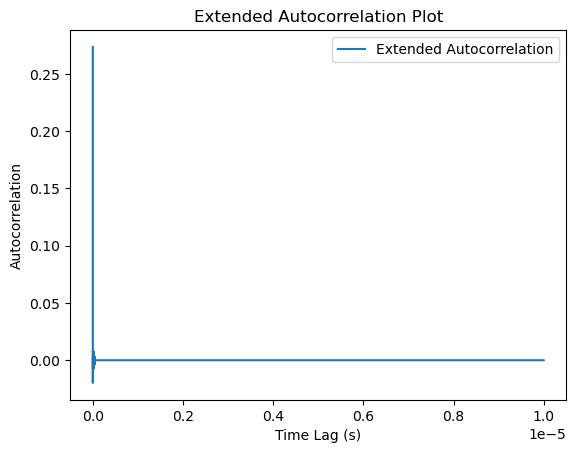

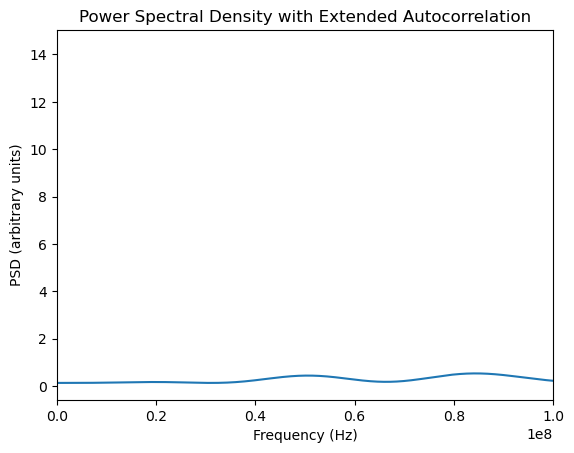

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

total_time = 0.05e-9
dt = 0.005e-12
steps = int(total_time / dt)
Jx_grid = np.load(r"P:\spin\Debang\Master_Thesis_2025\Sim\Jx_tee5e-12_timp5e-12.npy")
print(Jx_grid.shape)
center_ix=int(Jx_grid.shape[0]/2)
center_iy=int(Jx_grid.shape[1]/2)

# Autocorrelation for a selected pixel and normalization
pixel_data = Jx_grid[center_ix, center_iy, :]
transient = int(0.15 * steps)  # Remove initial transient

#pixel_data = pixel_data[transient:]
pixel_data = np.sum(Jx_grid[center_ix, :, transient:], axis=0)
pixel_data=pixel_data/Jx_grid.shape[1]

# Compute autocorrelation
corr = np.correlate(
    pixel_data - np.mean(pixel_data), pixel_data - np.mean(pixel_data), mode="full"
)
corr = corr[corr.size // 2 :]

# Extend autocorrelation with zeros up to 1e-3 seconds
extended_time = 1e-5  # Extended total time
extended_steps = int(extended_time / dt)

if extended_steps > len(corr):
    corr_extended = np.zeros(extended_steps)
    corr_extended[: len(corr)] = corr  # Copy original correlation values
else:
    corr_extended = corr  # No need to extend if already long enough
time_lags = np.arange(len(corr_extended)) * dt
# Plot Autocorrelation
plt.figure()
plt.plot(time_lags, corr_extended, label='Extended Autocorrelation')
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.title("Extended Autocorrelation Plot")
plt.legend()
plt.show()



# Compute PSD with extended correlation
psd = np.fft.rfft(corr_extended)
psd = np.real(psd)
freq = np.fft.rfftfreq(len(corr_extended), d=dt)

# Plot Power Spectral Density
plt.figure()
plt.plot(freq, psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (arbitrary units)")
plt.title("Power Spectral Density with Extended Autocorrelation")
plt.xlim(0, 1e8)
plt.show()





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

total_time = 0.05e-9
dt = 0.005e-12
steps = int(total_time / dt)
Jx_grid = np.load(r"P:\spin\Debang\Master_Thesis_2025\Sim\Jx_tee5e-14_timp5e-11_short.npy")
print(Jx_grid.shape)
center_ix=int(Jx_grid.shape[0]/2)
center_iy=int(Jx_grid.shape[1]/2)

# Autocorrelation for a selected pixel and normalization
pixel_data = Jx_grid[center_ix, center_iy, :]
transient = int(0.15 * steps)  # Remove initial transient

#pixel_data = pixel_data[transient:]
pixel_data = np.sum(Jx_grid[center_ix, :, transient:], axis=0)
pixel_data=pixel_data/Jx_grid.shape[1]

# Compute autocorrelation
corr = np.correlate(
    pixel_data - np.mean(pixel_data), pixel_data - np.mean(pixel_data), mode="full"
)
corr = corr[corr.size // 2 :]

# Extend autocorrelation with zeros up to 1e-3 seconds
extended_time = 1e-5  # Extended total time
extended_steps = int(extended_time / dt)

if extended_steps > len(corr):
    corr_extended = np.zeros(extended_steps)
    corr_extended[: len(corr)] = corr  # Copy original correlation values
else:
    corr_extended = corr  # No need to extend if already long enough
time_lags = np.arange(len(corr_extended)) * dt
# Plot Autocorrelation
plt.figure()
plt.plot(time_lags, corr_extended, label='Extended Autocorrelation')
plt.xlabel("Time Lag (s)")
plt.ylabel("Autocorrelation")
plt.title("Extended Autocorrelation Plot")
plt.legend()
plt.show()


# Compute PSD with extended correlation
psd = np.fft.rfft(corr_extended)
psd = np.real(psd)
freq = np.fft.rfftfreq(len(corr_extended), d=dt)

# Plot Power Spectral Density
plt.figure()
plt.plot(freq, psd)
plt.xlabel("Frequency (Hz)")
plt.ylabel("PSD (arbitrary units)")
plt.title("Power Spectral Density with Extended Autocorrelation")
plt.xlim(0, 1e8)
plt.show()





(40, 10, 10000)
a


MemoryError: Unable to allocate 14.9 GiB for an array with shape (2000000000,) and data type float64